# <div class="alert alert-danger" > Transforming  </div>


In this notebook, we will explore how to use Large Language Models for text transformation tasks such as language translation, spelling and grammar checking, tone adjustment, and format conversion.


Large language models are very good at transforming its input to a 
different format, such as inputting a 
piece of text in one language and transforming 
it or translating it to a different language, 
or helping with spelling and grammar corrections.

So taking as input a piece of text that may not be 
fully grammatical and helping you to fix that up a bit, 
or even transforming formats, such as inputting 
HTML and outputting JSON. So there's a bunch of applications that I 
used to write somewhat painfully with a bunch of regular expressions that 
would definitely be much more simply implemented now with a large language 
model and a few prompts. 

Yeah, I use ChatGPT to proofread pretty much everything 
I write these days, so I'm excited to show you 
some more examples in the notebook now.

 
### <div class="alert alert-success" > Setup
    
So first we'll import 
OpenAI and also use the same get_completion helper function 
that we've been using throughout the lessons. 

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo", temperature=0): 
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, 
    )
    return response.choices[0].message["content"]

### <div class="alert alert-info" > Translation </div>
    
The first thing 
we'll do is a translation task. So large language models are 
trained on a lot of text from many sources, a 
lot of which is the internet, and this is, 
of course, in many different languages. So this kind of imbues 
the model with the ability to do translation. 
And these models know hundreds of languages to varying 
degrees of proficiency. And so we'll go through 
some examples of how to use this capability.    
        
    

`ChatGPT is trained with sources in many languages. This gives the model the ability to do translation. Here are some examples of how to use this capability.`


#### Example 1
So let's start off with something simple. 
So in this first example, the prompt is 
translate the following English text to Spanish. "Hi, 
I would like to order a blender". And the response is "Hola, 
me gustaría ordenar una licuadora". 


In [4]:
prompt = f"""

Translate the following English text to Spanish: \ 
```Hi, I would like to order a blender```

"""
# response = get_completion(prompt)
# print(response)

<b>Output:</b>

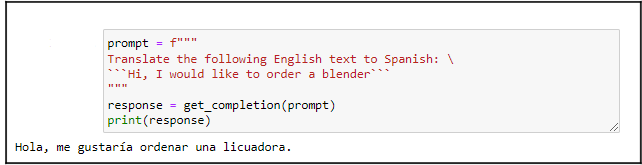


#### Example 2
Okay, let's try another example. So in this example, the prompt is "Tell 
me what language this is". 
And then this is in French, "Combien coûte le lampadaire". 
And so let's run this. And the model has identified that "This is French." 

In [5]:
prompt = f"""
Tell me which language this is: 
```Combien coûte le lampadaire?```
"""
# response = get_completion(prompt)
# print(response)

<b>Output:</b>

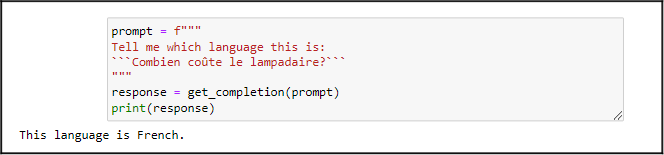


#### Example 3
The model can also do multiple translations at once. 
So in this example, let's say translate the following text 
to French and Spanish. 
And you know what? Let's add another an English pirate. And the text is "I want to order a basketball". 



In [6]:
prompt = f"""
Translate the following  text to French and Spanish
and English pirate: \
```I want to order a basketball```
"""
# response = get_completion(prompt)
# print(response)

<b>Output:</b>

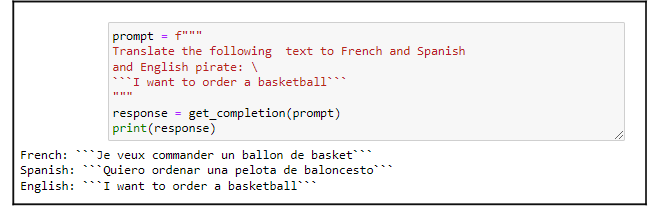

So here we have French, Spanish and English pirate.

#### Example 4
So in some languages, the translation can change 
depending on the speaker's relationship to the listener. And 
you can also explain this to the language model. And 
so it will be able to translate accordingly. 
So in this example, we say, "Translate 
the following text to Spanish in both the 
formal and informal forms". "Would you like to order a pillow?" And 
also notice here we're using a different delimiter than 
these backticks. It doesn't really matter 
as long as there's kind of a clear separation.

In [ ]:
prompt = f"""
Translate the following text to Spanish in both the \
formal and informal forms: 
'Would you like to order a pillow?'
"""
# response = get_completion(prompt)
# print(response)

<b>Output:</b>

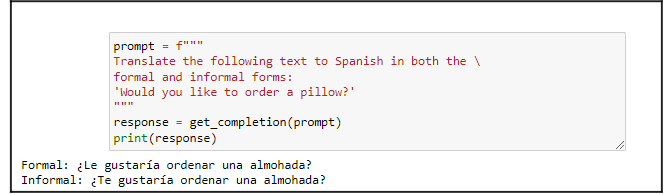

So here we have the formal and informal. 
So formal is when you're speaking to someone who's maybe 
senior to you or you're in a professional situation. That's when you 
use a formal tone and then informal is when you're speaking to maybe a 
group of friends. 

### <div class="alert alert-info" > Universal Translator </div>


`Imagine you are in charge of IT at a large multinational e-commerce company. Users are messaging you with IT issues in all their native languages. Your staff is from all over the world and speaks only their native languages. You need a universal translator!`


So for the next example, we're 
going to pretend that we're in charge of a multinational e-commerce company 
and so the user messages are going to be in all 
different languages and so users are going to 
be telling us about their IT issues in a wide variety of 
languages. So we need a universal translator. So first we'll 
just paste in a list of user messages in a variety of different languages.

In [7]:
user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal         
  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting
  "Il mio mouse non funziona",                                 # My mouse is not working
  "Mój klawisz Ctrl jest zepsuty",                             # My keyboard has a broken control key
  "我的屏幕在闪烁"                                               # My screen is flashing
] 

And now we will loop through each of these user messages. 
So "for issue in user_messages". 
And then I'm going to copy over this slightly longer code block. 
And so the first thing we'll do is ask the model 
to tell us what language the issue is in. So here's the 
prompt. Then we'll print out the original message's language and the 
issue. And then we'll ask the model to translate it into English and 
Korean. 

In [10]:
for issue in user_messages:
    
    prompt = f"Tell me what language this is: ```{issue}```"
    
#     lang = get_completion(prompt)
    
#     print(f"Original message ({lang}): {issue}")

    prompt = f"""
    
    Translate the following  text to English \
    and Korean: ```{issue}```
    
    """
#     response = get_completion(prompt)
#     print(response, "\n")

So let's run this. 

<b>Output</b>

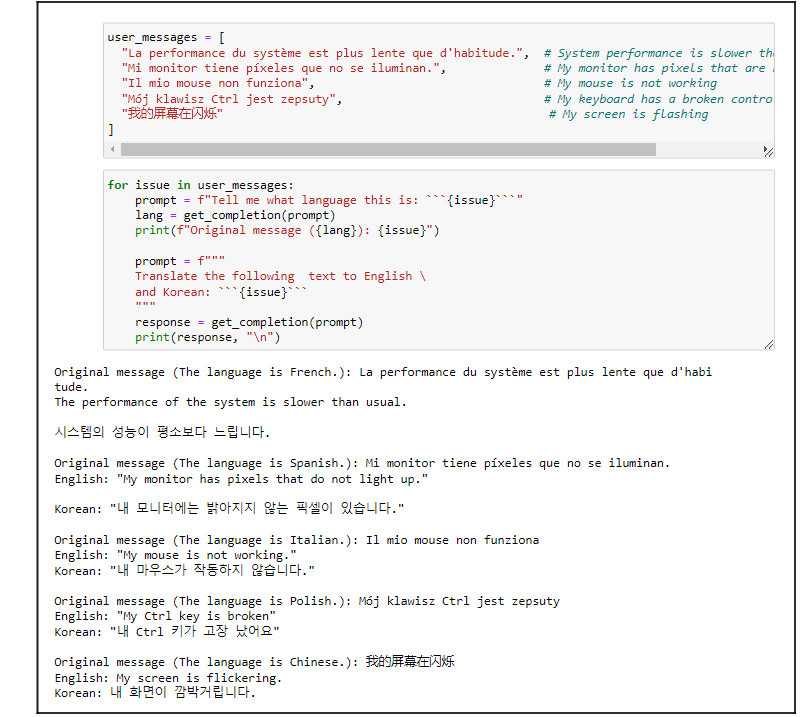

 
And so amazing, you've just built a universal translator. And 
also feel free to pause the video and add kind 
of any other languages you want to try here. Maybe 
languages you speak yourself and see how the model 
does.

### <div class="alert alert-info" > Tone Transformation
`Writing can vary based on the intended audience. ChatGPT can produce different tones.`

So, the next thing we're going to dive into 
is tone transformation. Writing can vary based on 
an intended audience, you know, the way that I would write an email to 
a colleague or a professor is obviously going 
to be quite different to the way I 
text my younger brother. And so, ChatGPT can actually also help 
produce different tones. 
So, let's look at some examples.
    
<b>Example </b>
    
So, in this first example, the 
prompt is "Translate the following from slang 
to a business letter". "Dude, this is Joe, check out this spec on 
the standing lamp." 

In [11]:
prompt = f"""
Translate the following from slang to a business letter: 
'Dude, This is Joe, check out this spec on this standing lamp.'
"""
# response = get_completion(prompt)
# print(response)

So, let's execute this. 

<b> Output</b>

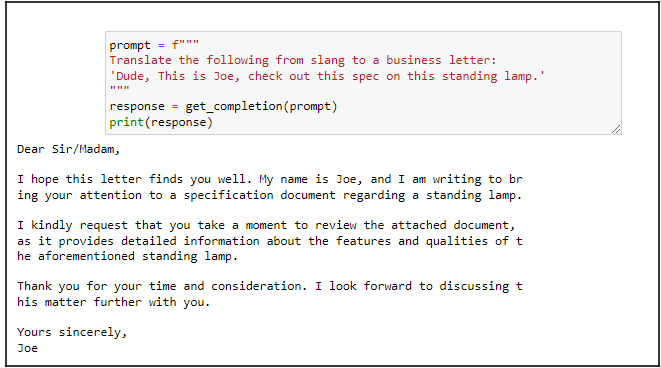

And as you can see, we have a much more formal business letter 
with a proposal for a standing lamp specification.

### <div class="alert alert-info" > Format Conversion
`ChatGPT can translate between formats. The prompt should describe the input and output formats.`


The next thing that we're going to do is to 
convert between different formats. ChatGPT is very good at translating between 
different formats such as JSON to HTML, you know, XML, all 
kinds of things. Markdown. 
And so, in the prompt, we'll describe both the input 
and the output formats. 

<b>Example </b>

Here is an example. So, we 
have this JSON that contains a list of 
restaurant employees with their name and email. 
And then in the prompt, we're going to ask the 
model to translate this from JSON to HTML. So, the 
prompt is "Translate the following Python dictionary 
from JSON to an HTML table with column 
headers and title". And then we'll get the response from the 
model and print it.


In [12]:
data_json = { "resturant employees" :[ 
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
# response = get_completion(prompt)
# print(response)

So, here we have some HTML displaying all of 
the employee names and emails. 

<b>Output </b>

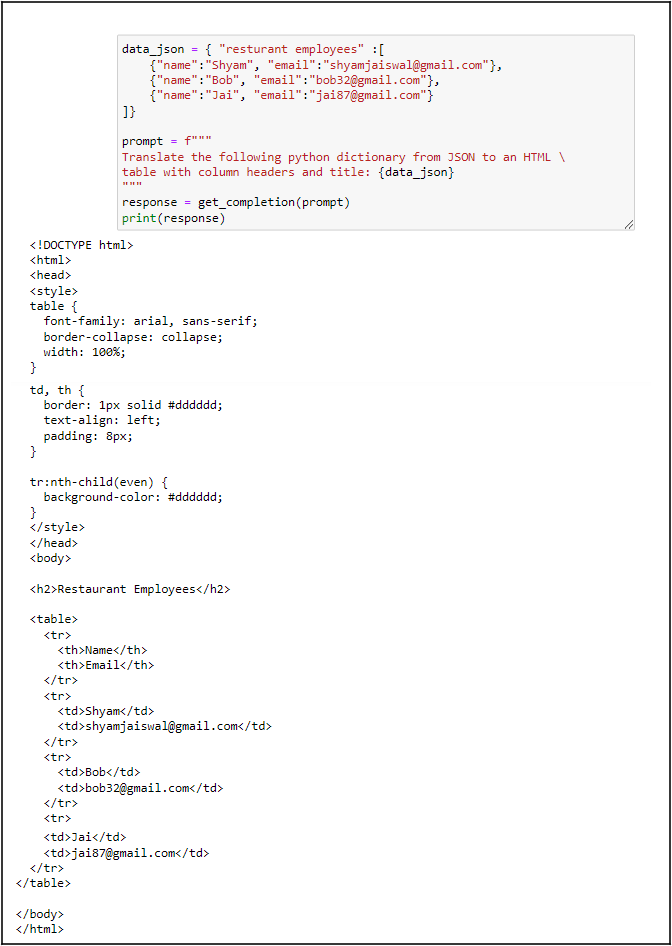

And so, now let's see if we can actually view this HTML. So, 
we're going to use this display function from this Python library, 
"display (HTML(response))". 
 

In [13]:
# from IPython.display import display, Markdown, Latex, HTML, JSON
# display(HTML(response))

And here you can see that this is a properly formatted HTML table. 
The next transformation task we're going to do is spell 
check and grammar checking. And this is a really kind 
of popular use for ChatGPT. I highly recommend doing this, I 
do this all the time. And it's especially useful when you're working in 
a non-native language. And so here are some examples of some common grammar 
and spelling problems and how the language model can help address these. 
So I'm going to paste in a list of sentences that have some grammatical 
or spelling errors.

<b>Output</b>

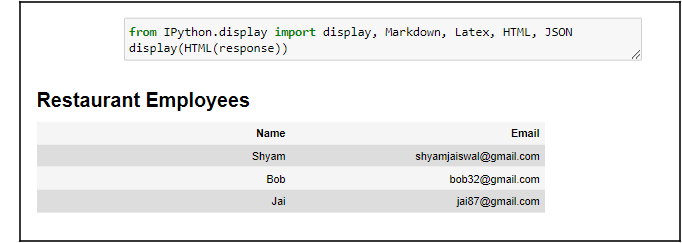

And here you can see that this is a properly formatted HTML table.

## Spellcheck/Grammar check.

The next transformation task we're going to do is spell 
check and grammar checking. And this is a really kind 
of popular use for ChatGPT. I highly recommend doing this, I 
do this all the time. And it's especially useful when you're working in 
a non-native language. 

Here are some examples of common grammar and spelling problems and the LLM's response. 

<b>Example 1 <b>
    
To signal to the LLM that you want it to proofread your text, you instruct the model to 'proofread' or 'proofread and correct'.

In [14]:
text = [ 
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yolanda has her notebook.", # ok
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
  "Your going to need you’re notebook.",  # Homonyms
  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
for t in text:
    prompt = f"""Proofread and correct the following text
    and rewrite the corrected version. If you don't find
    and errors, just say "No errors found". Don't use 
    any punctuation around the text:
    ```{t}```"""
#     response = get_completion(prompt)
#     print(response)

<b>Output</b>



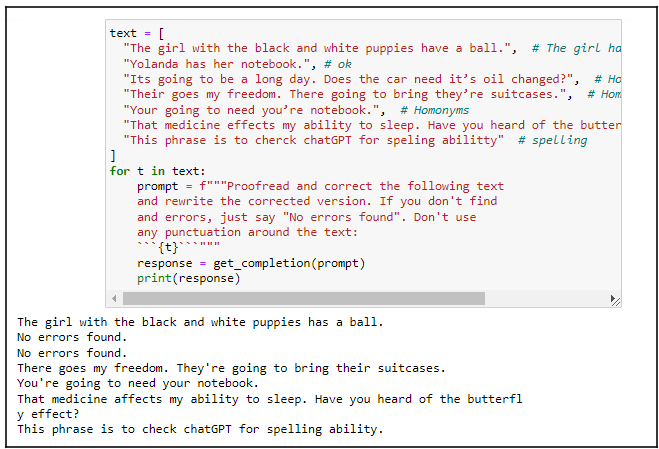

<b>Example 2<b>
    
And so now we'll do another example. It's always useful to check your text 
before you post it in a public forum. And so we'll go through 
an example of checking a review. And so here 
is a review about a stuffed panda. And so we're 
going to ask the model to proofread and correct the review. 

In [15]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"



# response = get_completion(prompt)
# print(response)

<b>Output</b>

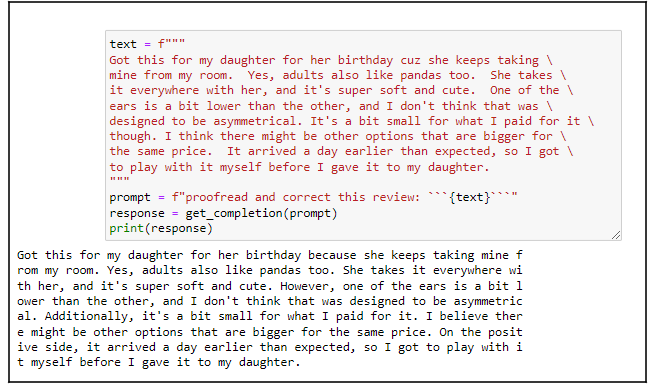


 
Great. So we have this corrected version. 


In [ ]:
# from redlines import Redlines

# diff = Redlines(text,response)
# display(Markdown(diff.output_markdown))

And one cool thing we can do is find the differences between our original review and the model's output. So 
we're going to use this redlines Python package to do this. And we're 
going to get the diff between the original text of 
our review and the model output and then display this. 


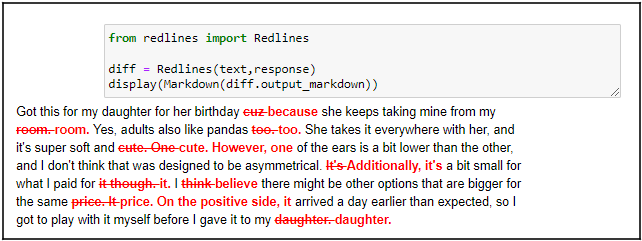

And so here you can see the diff between the original review and the model output and the things that have been corrected. 

<b>Example 3<b>

So, the prompt that we used was, "proofread and correct this review". But you can also make more dramatic changes, changes to tone, and that kind of thing. So, let's try one more thing. So, in this prompt, we're going to ask the model to proofread and correct this same review, but also make it more compelling and ensure that it follows APA style and targets an advanced reader. And we're also going to ask for the output in markdown format. And so we're using the same text from the original review 
up here.

In [16]:
prompt = f"""
proofread and correct this review. Make it more compelling. 
Ensure it follows APA style guide and targets an advanced reader. 
Output in markdown format.
Text: ```{text}```
"""
# response = get_completion(prompt)
# display(Markdown(response))

So, let's execute this. 

<b>Output</b>

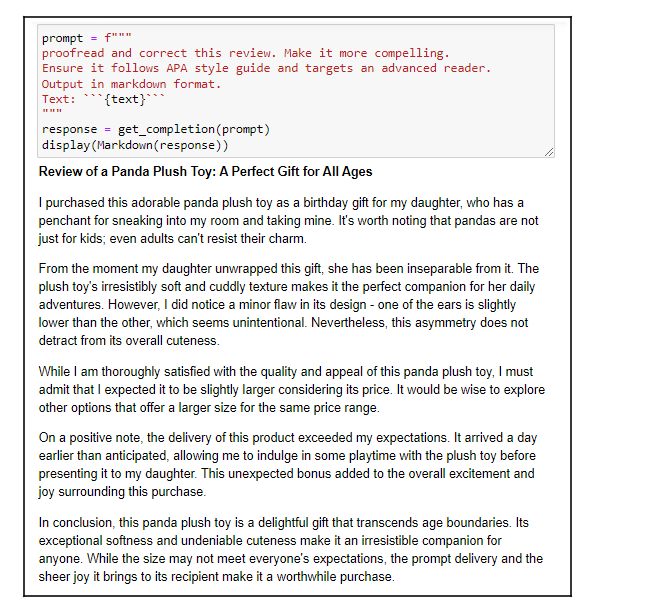

And here we have an expanded APA style 
review of the softpanda.

## Try it yourself!
Try changing the instructions to form your own review.

Thanks to the following sites:

https://writingprompts.com/bad-grammar-examples/
